# モデルを作るにあたっての準備

## ライブラリと音データの入力

In [1]:
# データ数
N = 50
import librosa
import matplotlib.pyplot as plt

In [2]:
y = []
sr = []
for i in range(N):
    wav_data = librosa.load('./sample_audio/sample_audio_' + str(i+1) + '.wav')
    y.append(wav_data[0])
    sr.append(wav_data[1])

In [3]:
y

[array([-3.7070137e-04, -8.3923014e-04, -5.2301108e-04, ...,
        -1.5726950e-04, -3.5012654e-05,  1.1354590e-04], dtype=float32),
 array([ 0.00056802,  0.00181139,  0.00152584, ..., -0.01593991,
        -0.01138954, -0.00550623], dtype=float32),
 array([ 0.00016875,  0.00042706,  0.00028777, ..., -0.00779167,
        -0.00596053, -0.0031264 ], dtype=float32),
 array([ 0.00045525,  0.00059209,  0.0001034 , ..., -0.00815751,
        -0.0058465 , -0.00271373], dtype=float32),
 array([6.7900977e-04, 1.9104043e-03, 1.4980445e-03, ..., 7.2867821e-05,
        7.9438942e-05, 2.6509988e-06], dtype=float32),
 array([ 0.00052965,  0.00184721,  0.00161853, ..., -0.00808997,
        -0.00577559, -0.00271271], dtype=float32),
 array([-2.0634445e-05, -4.1044317e-05, -2.2468645e-05, ...,
        -3.6759797e-04,  4.2539925e-04,  5.8745034e-04], dtype=float32),
 array([-2.9515693e-04, -9.3370350e-04, -7.3530653e-04, ...,
         1.5168832e-04,  2.2597233e-05, -1.1943656e-04], dtype=float32),
 array

In [4]:
sr

[22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050,
 22050]

In [5]:
type(sr)

list

## メルスペクトログラムを計算

In [6]:
import librosa.display

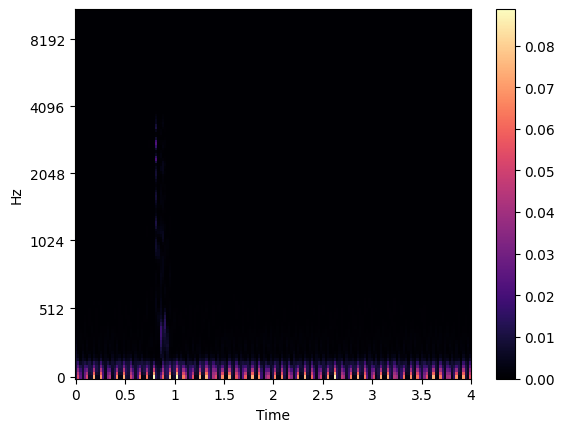

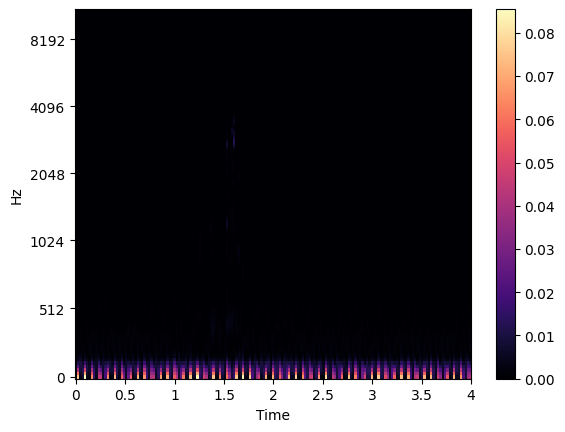

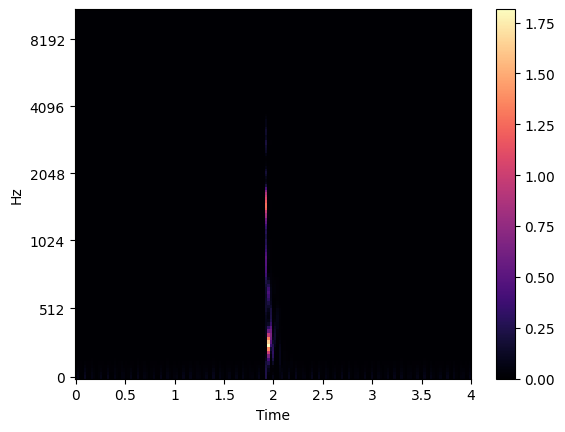

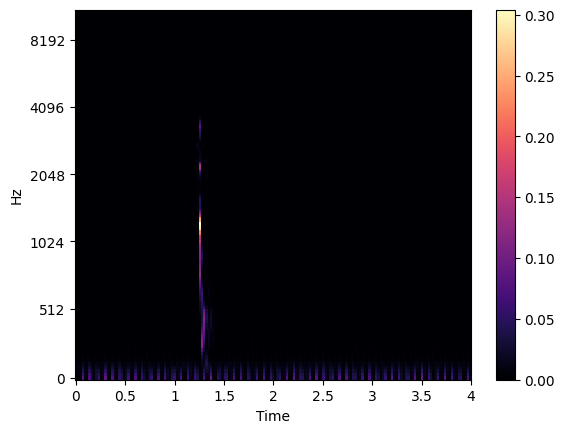

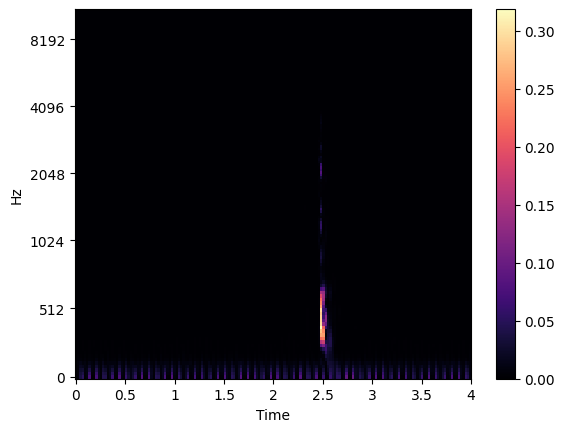

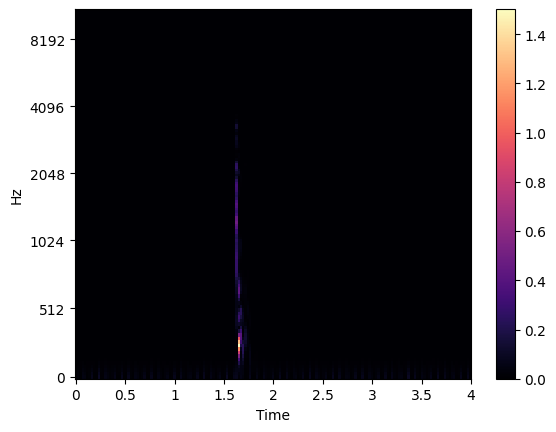

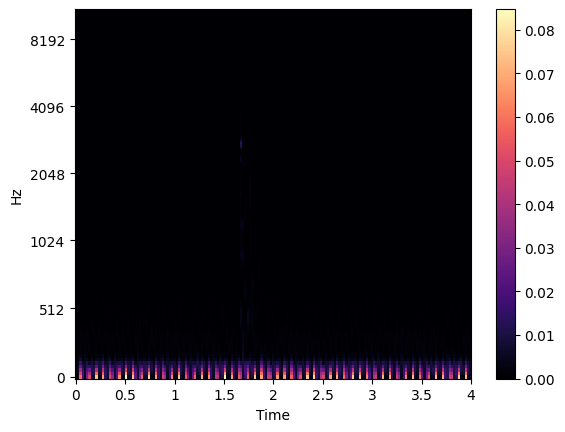

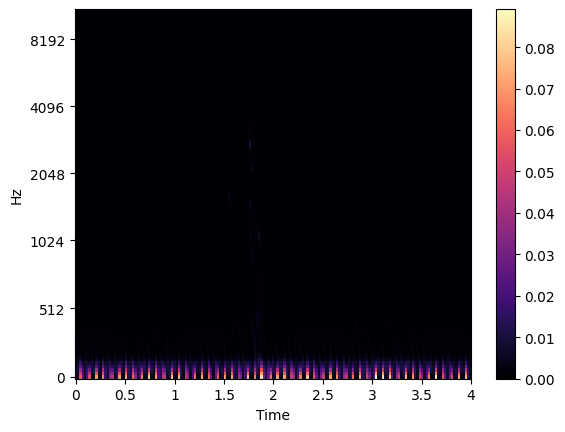

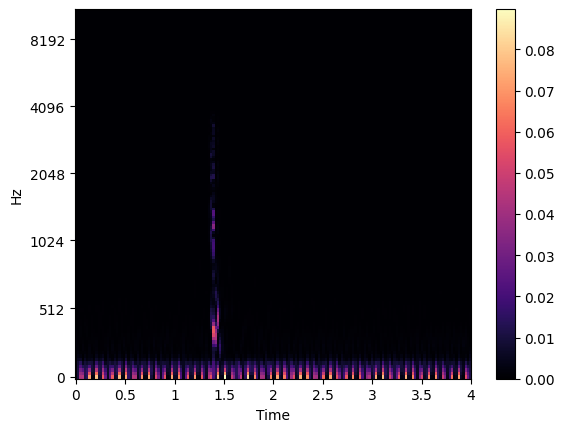

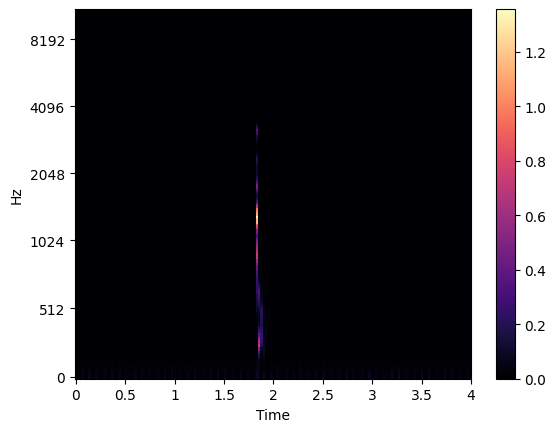

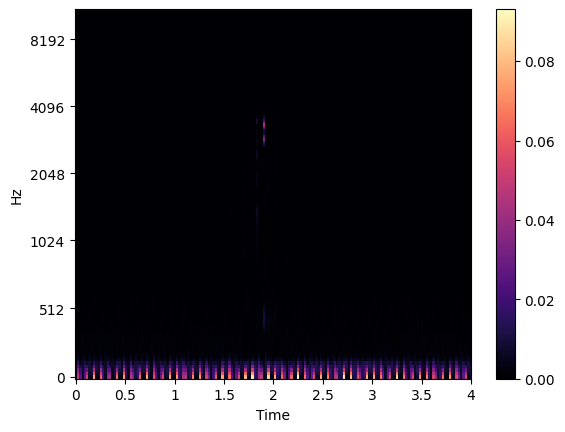

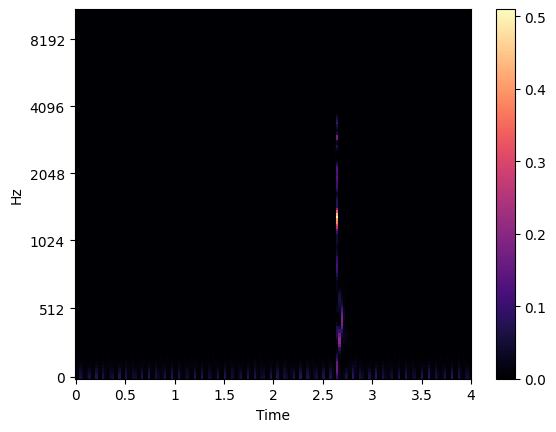

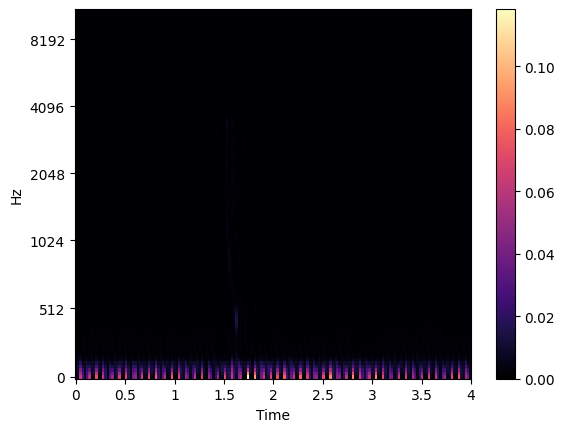

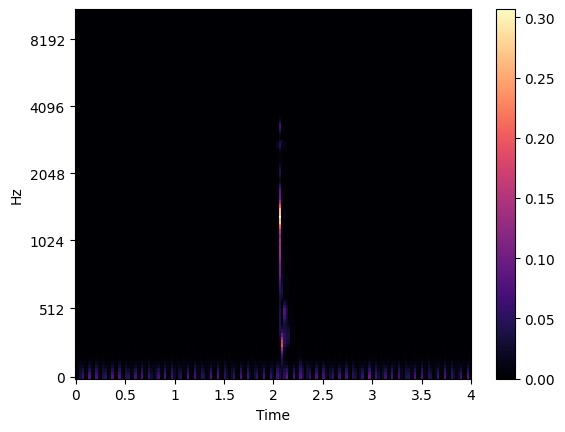

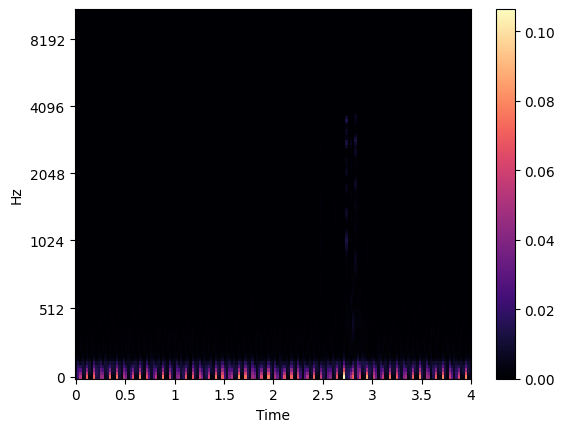

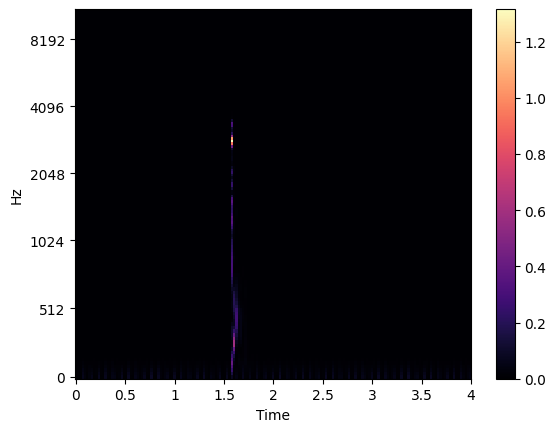

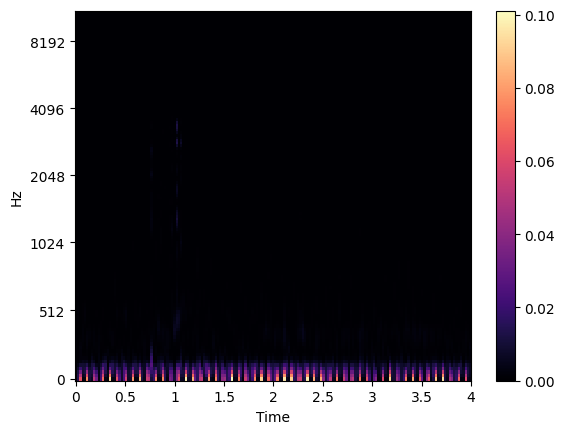

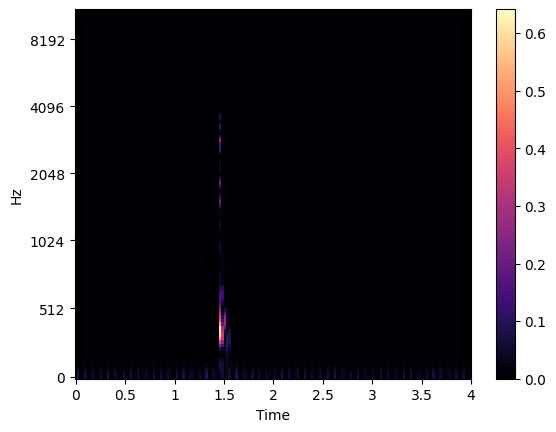

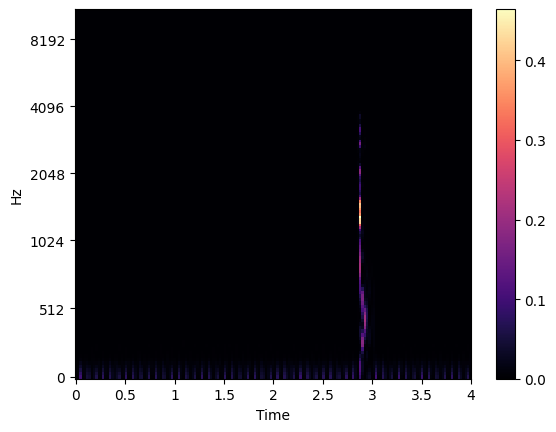

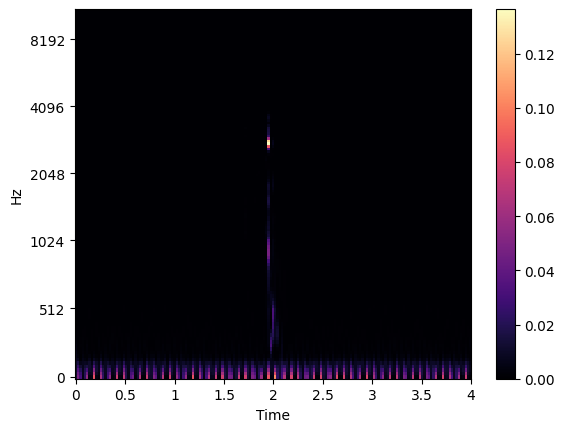

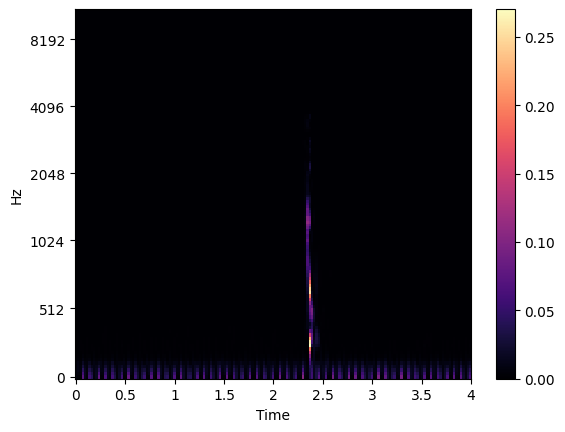

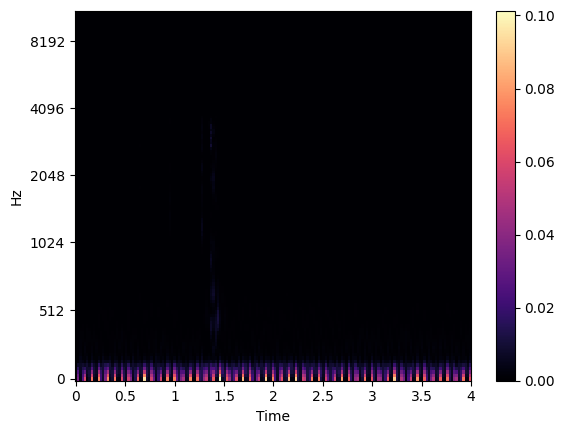

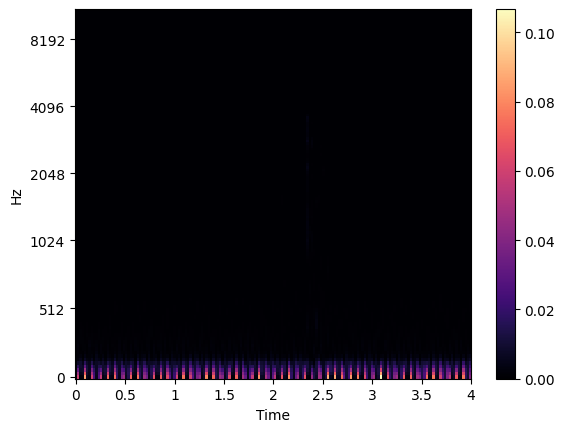

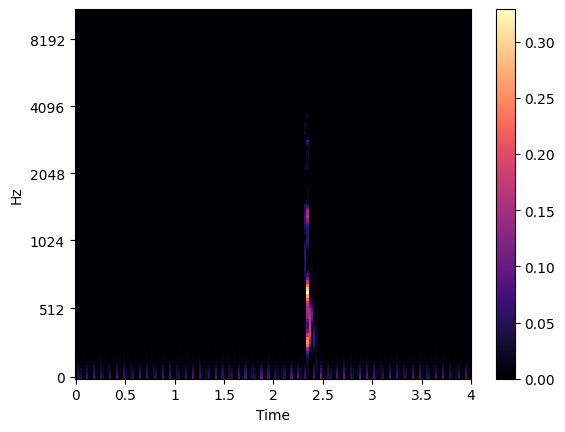

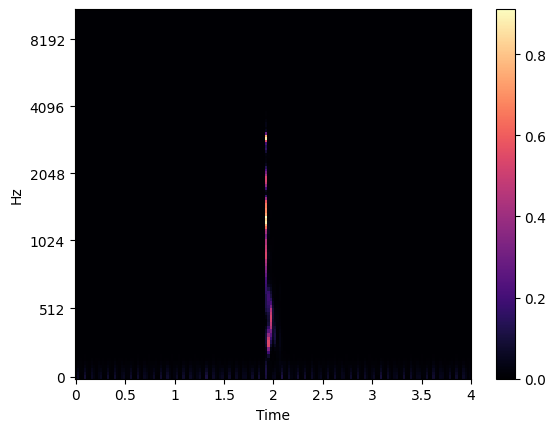

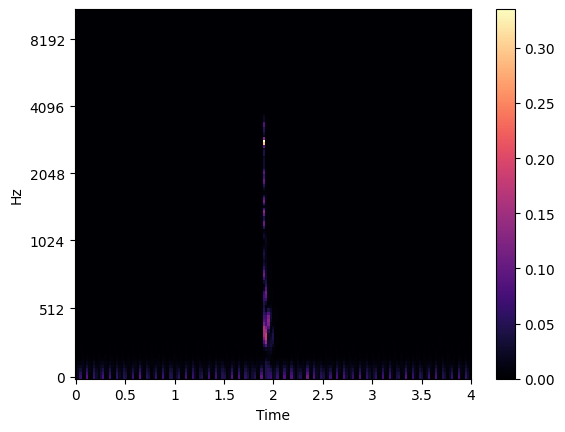

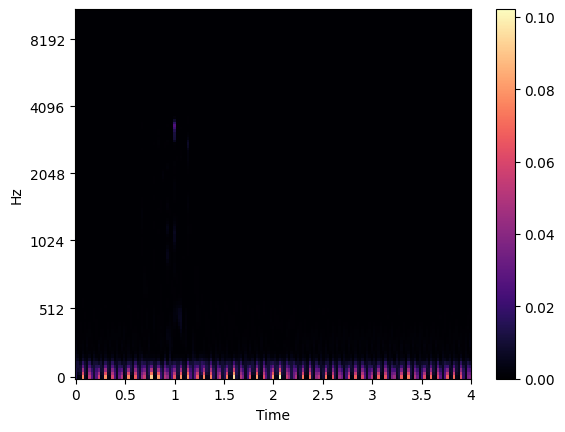

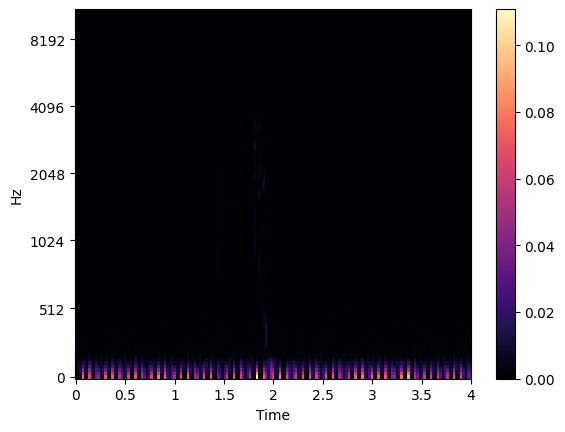

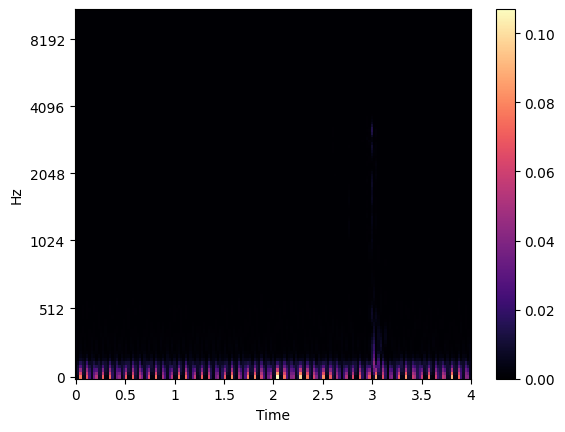

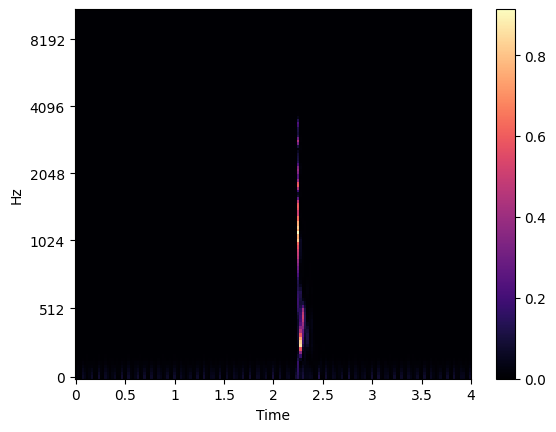

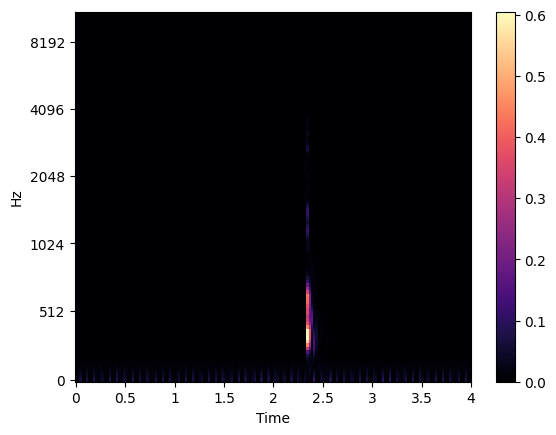

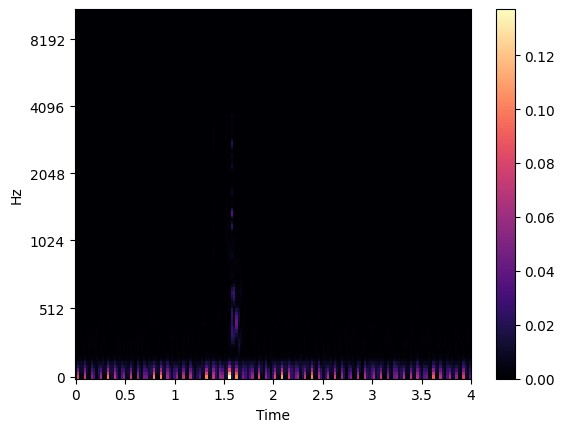

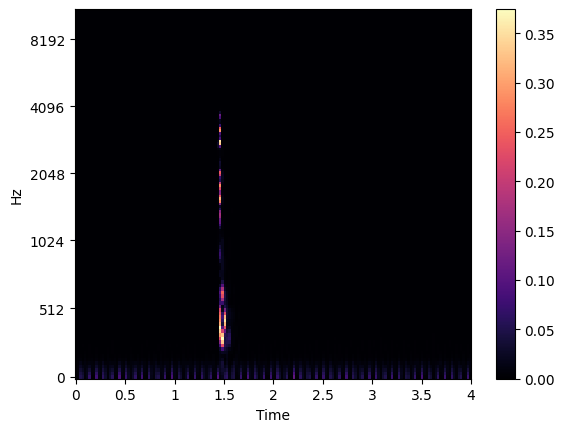

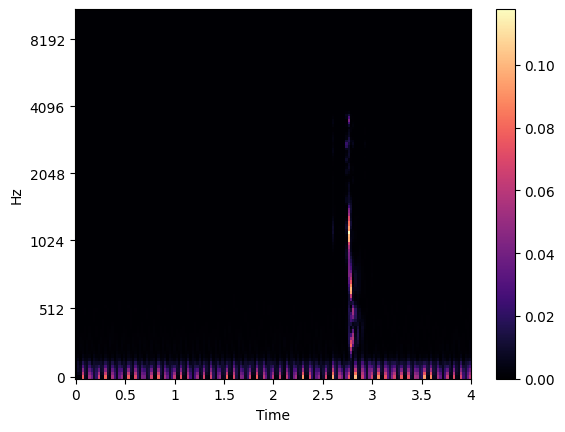

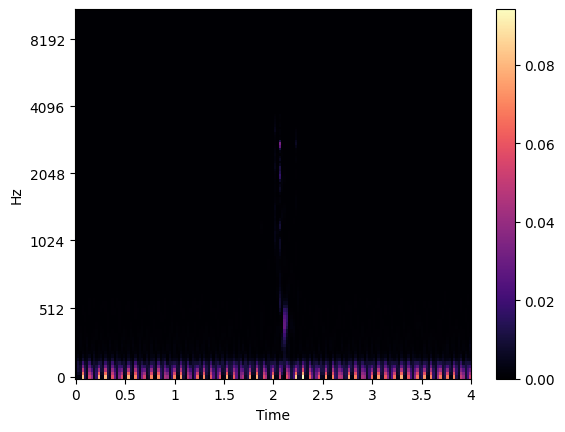

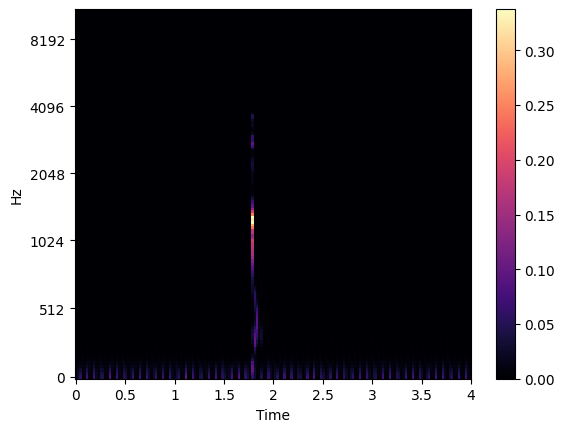

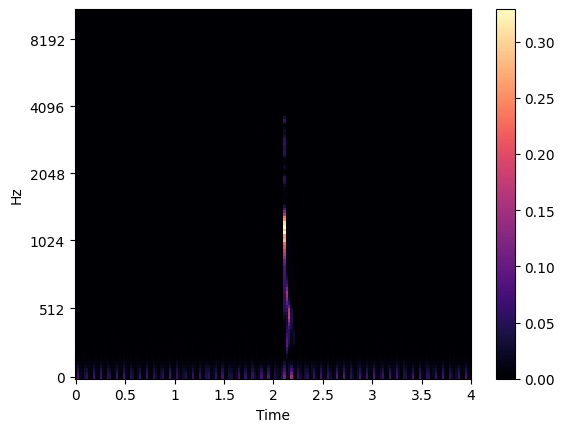

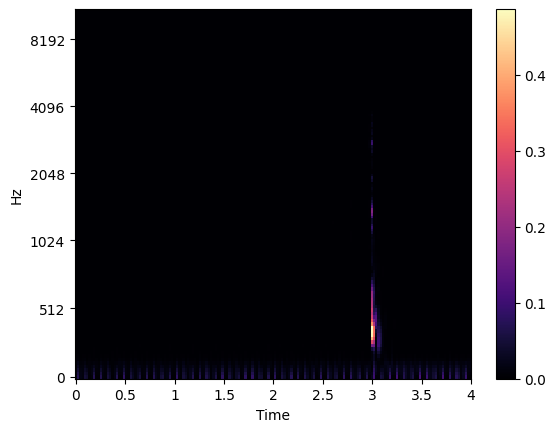

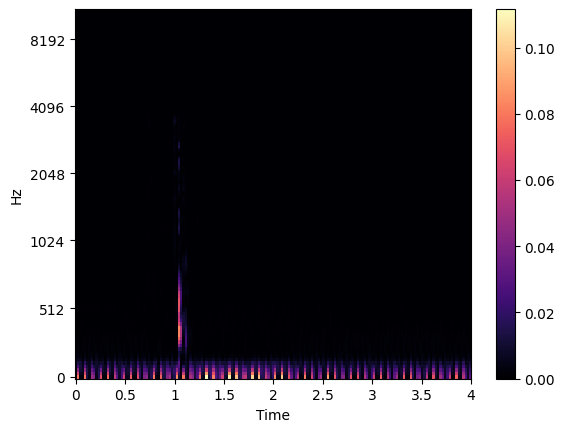

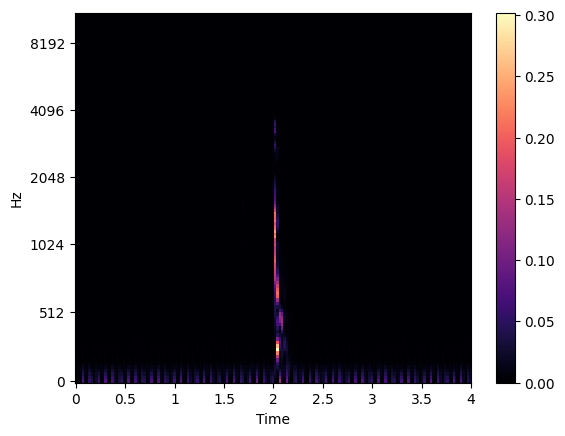

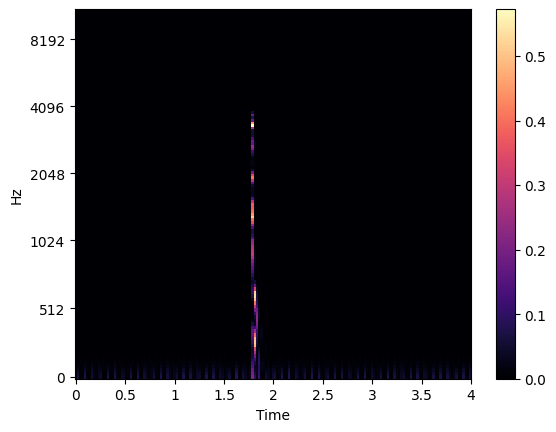

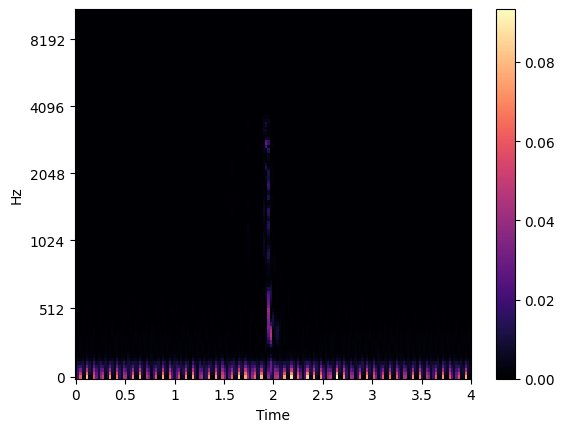

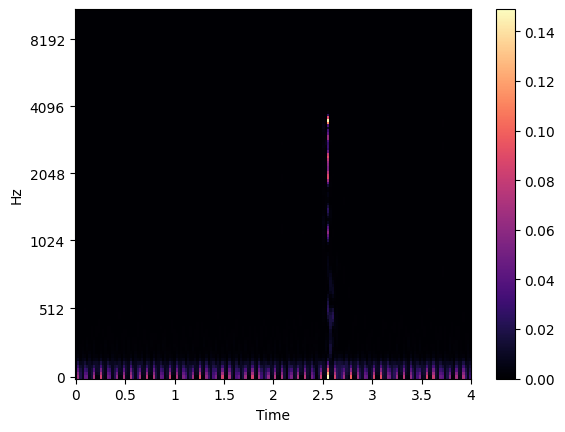

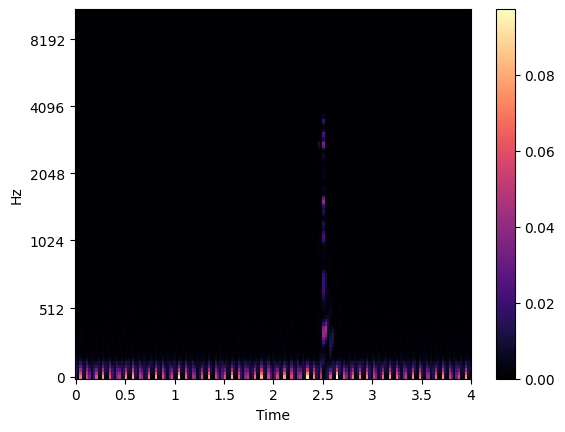

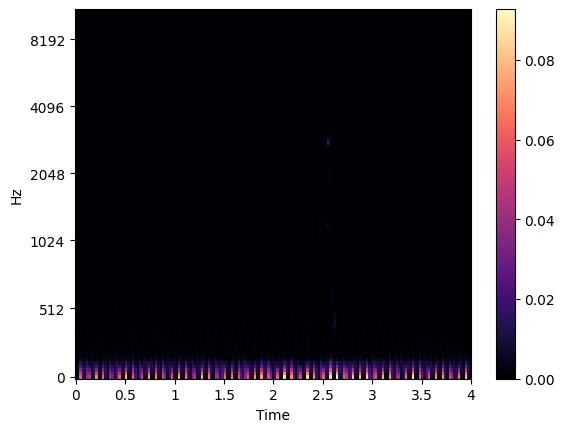

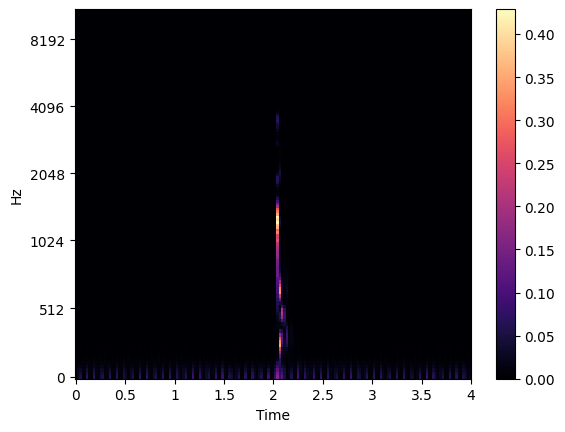

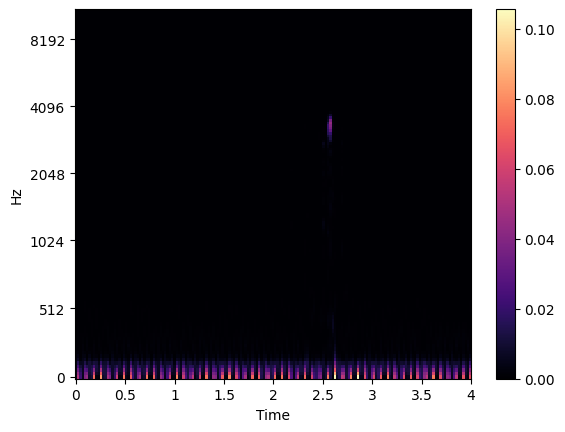

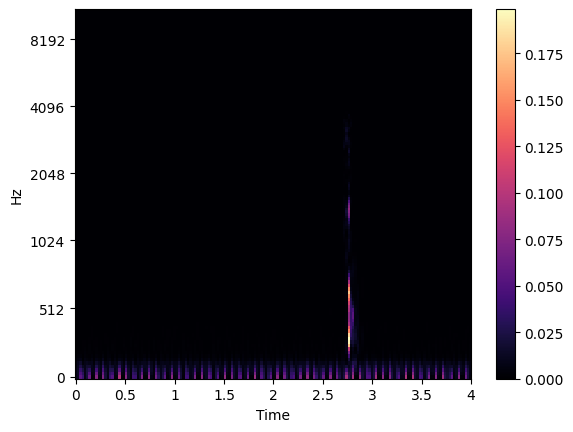

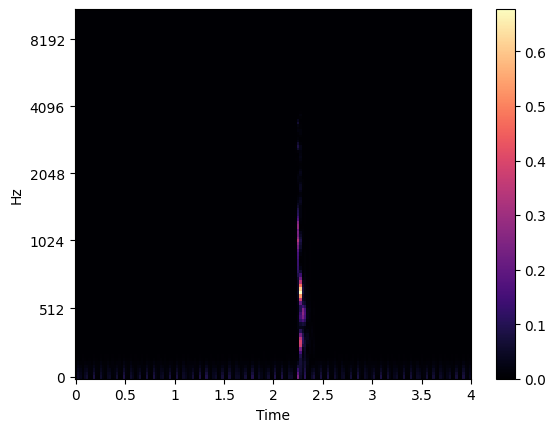

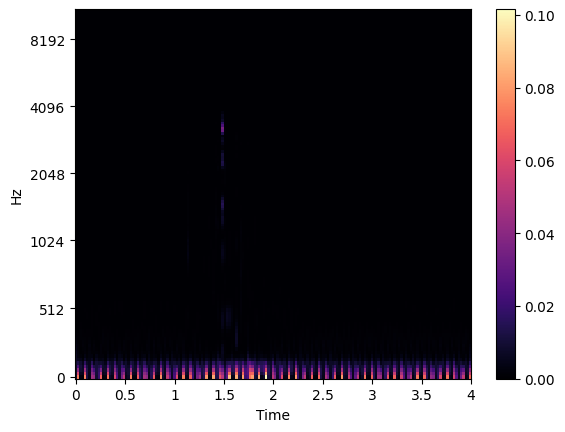

In [7]:
S = []
img = []
for i in range(N):
    S.append(librosa.feature.melspectrogram(y=y[i], sr=sr[i], n_fft=1024, win_length=256, hop_length=256))
    img.append(librosa.display.specshow(S[i], x_axis='time', y_axis='mel', sr=sr[i]))
    plt.colorbar(img[i])
    plt.show()

## メルスペクトログラムのパワーをdB単位に変換

In [8]:
import numpy as np

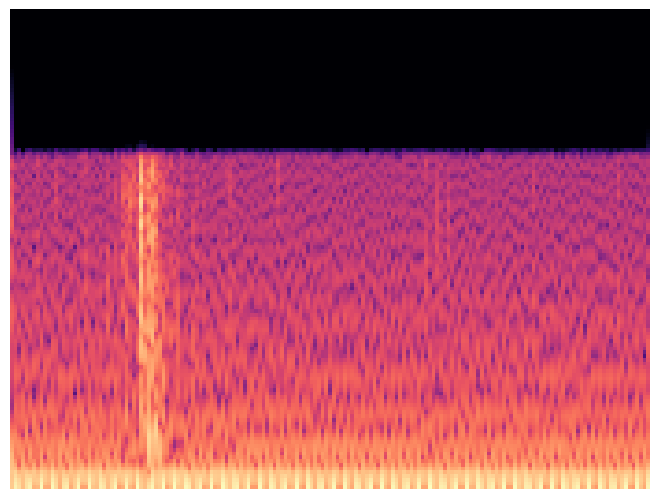

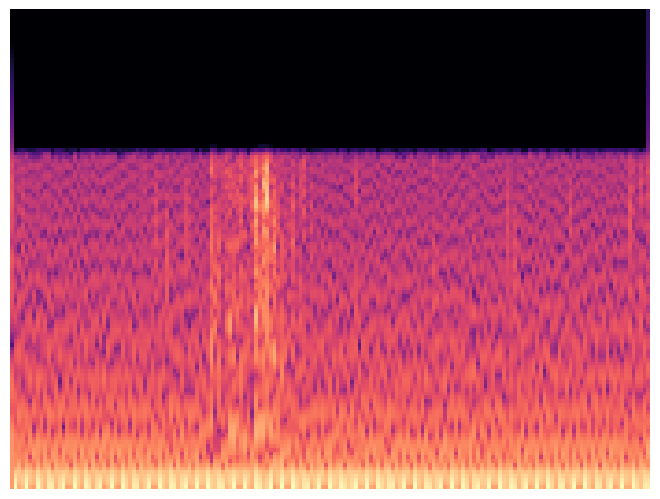

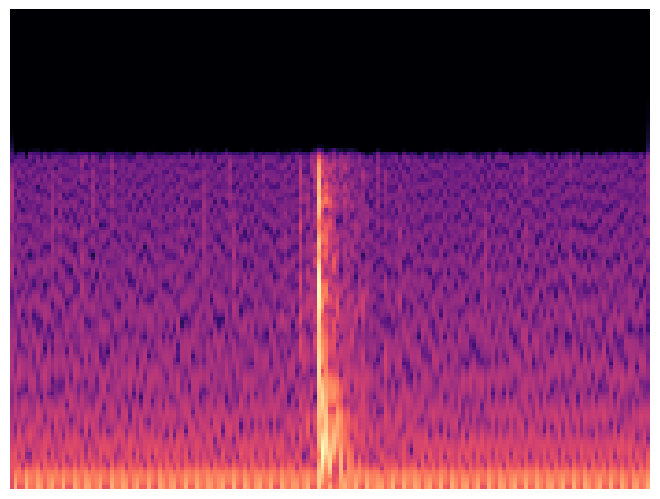

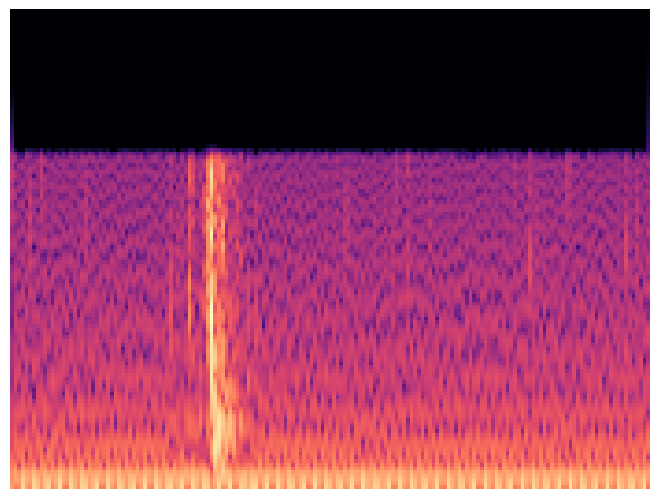

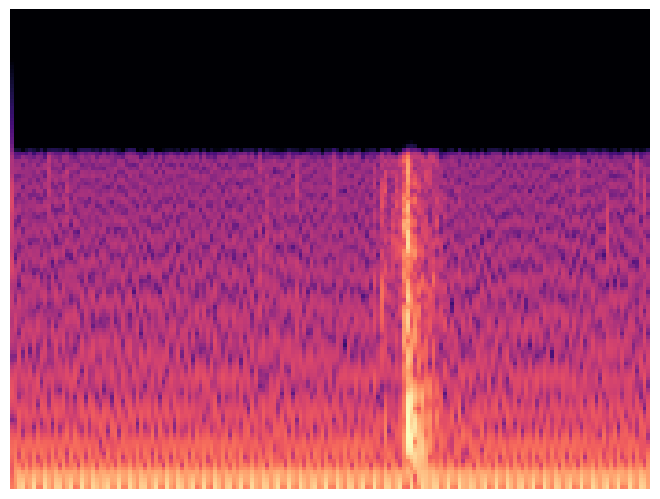

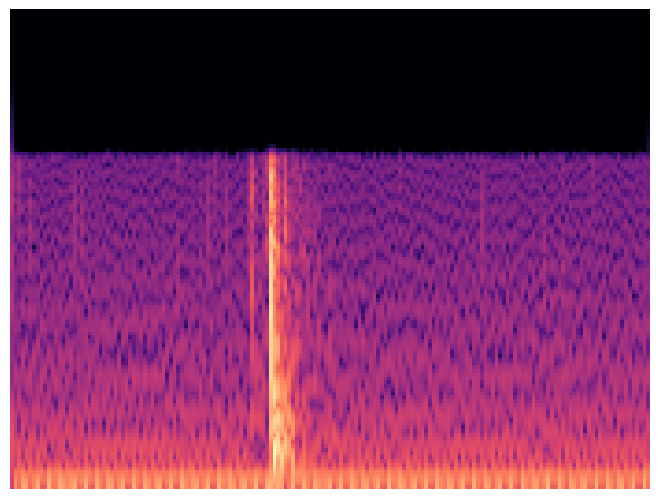

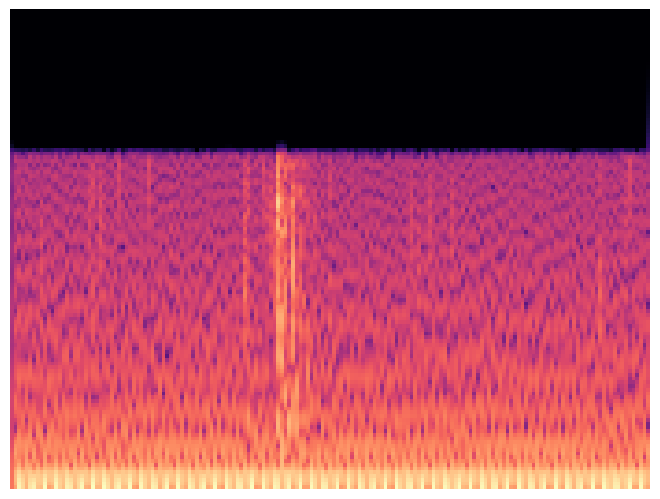

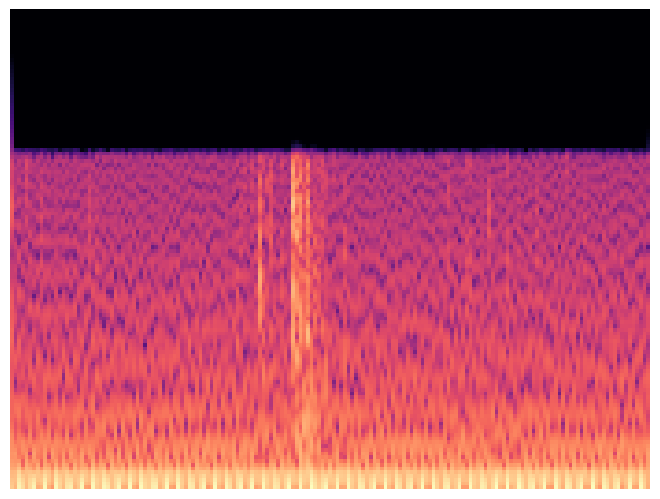

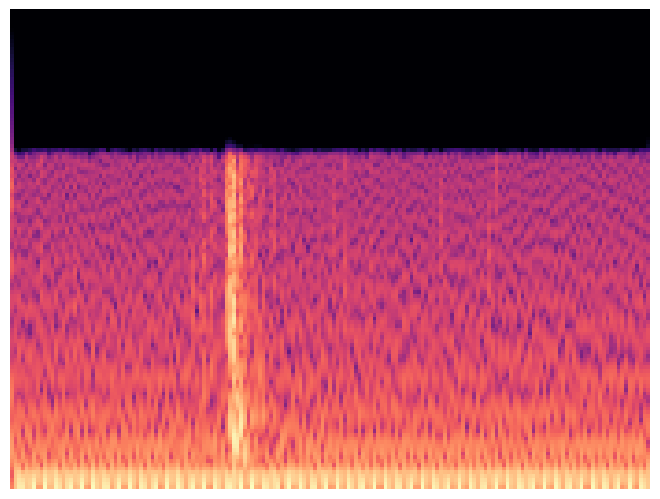

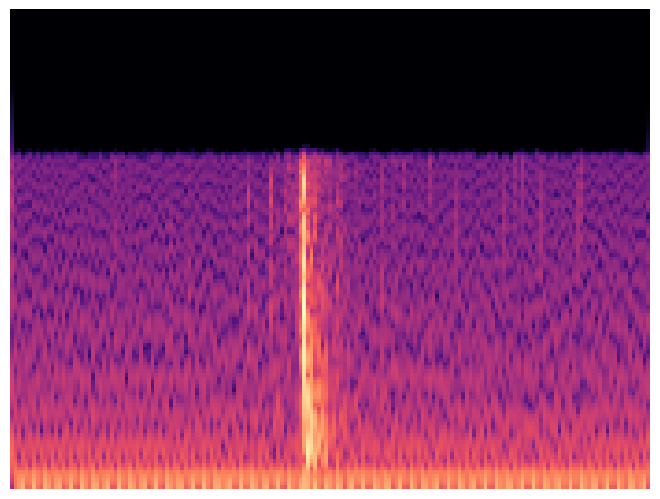

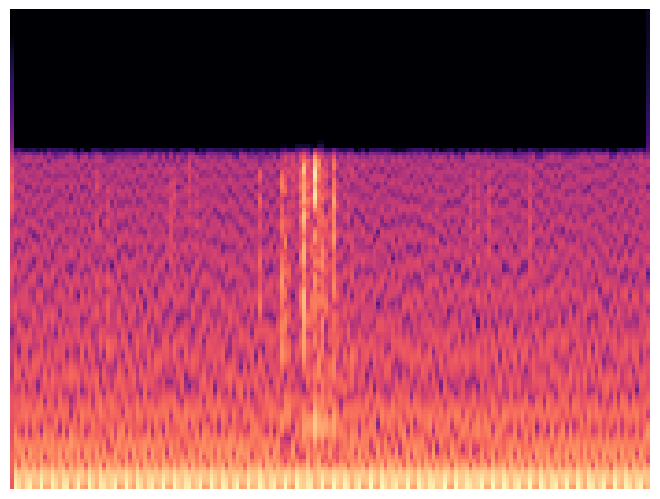

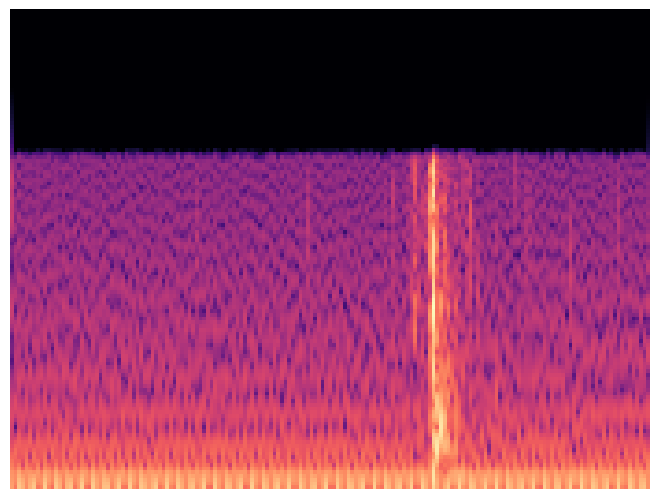

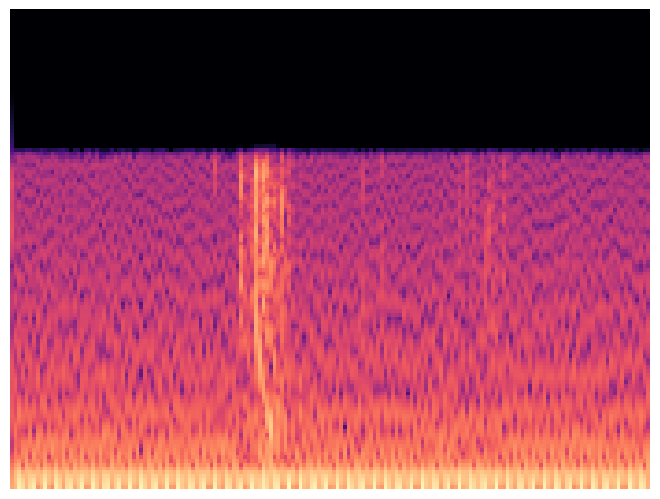

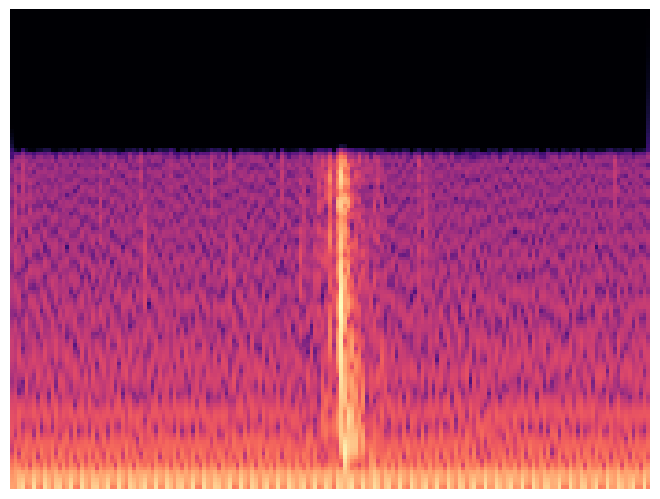

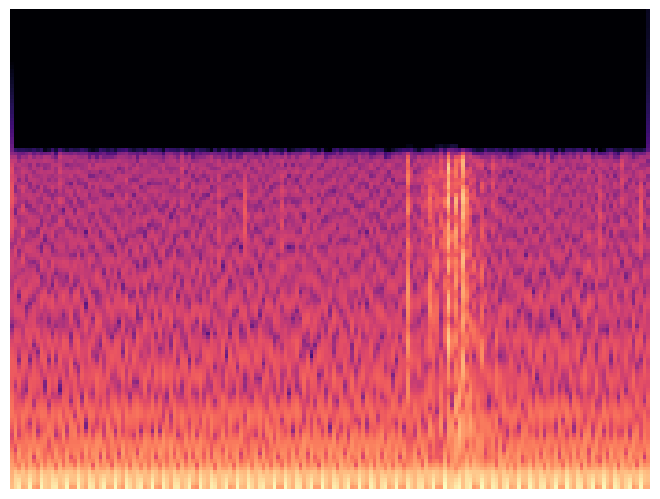

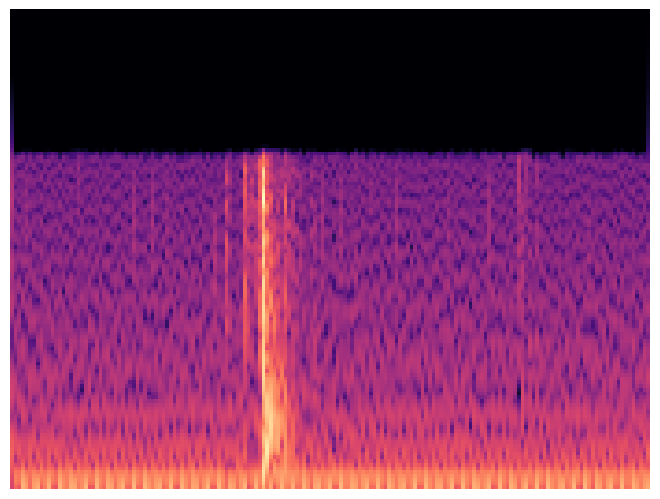

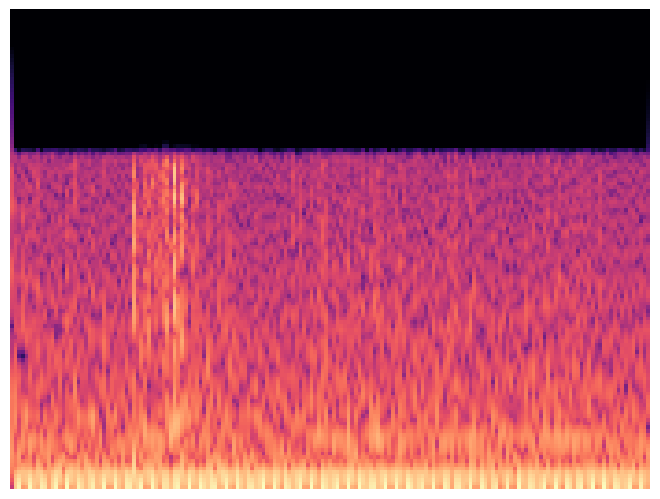

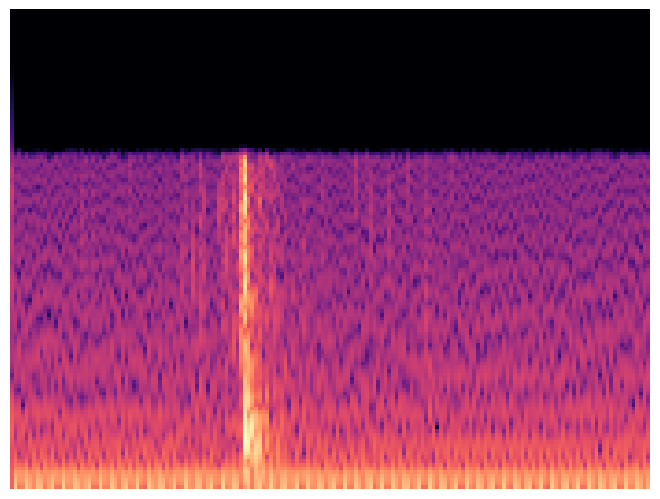

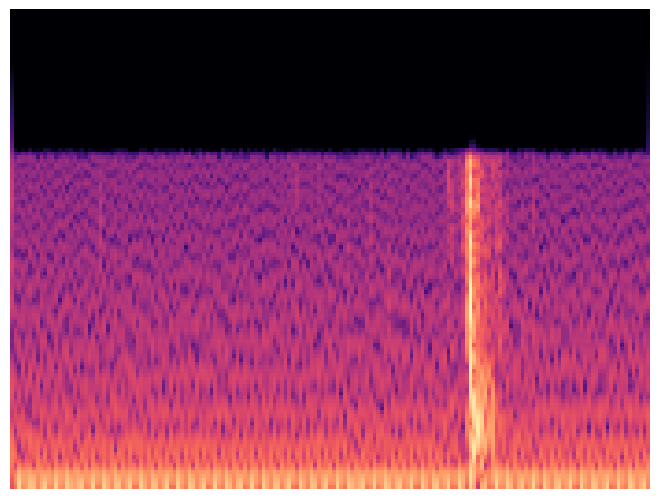

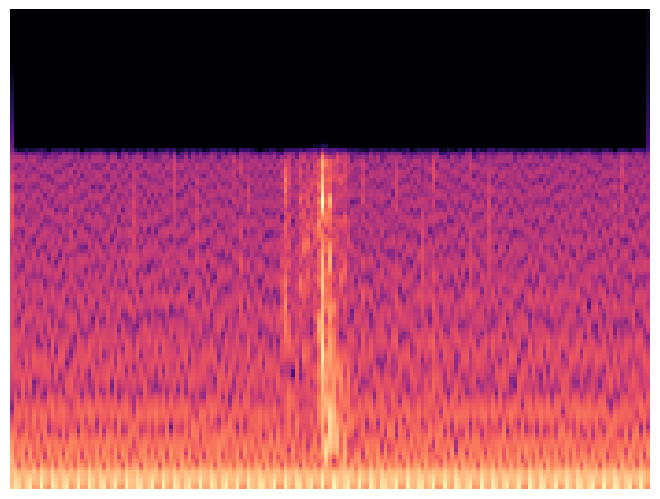

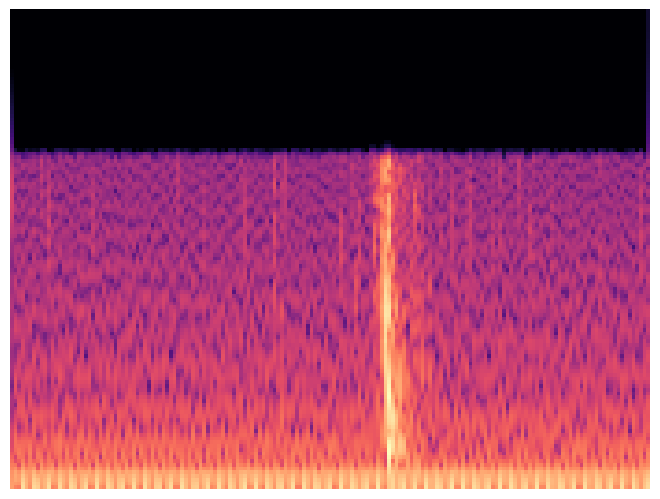

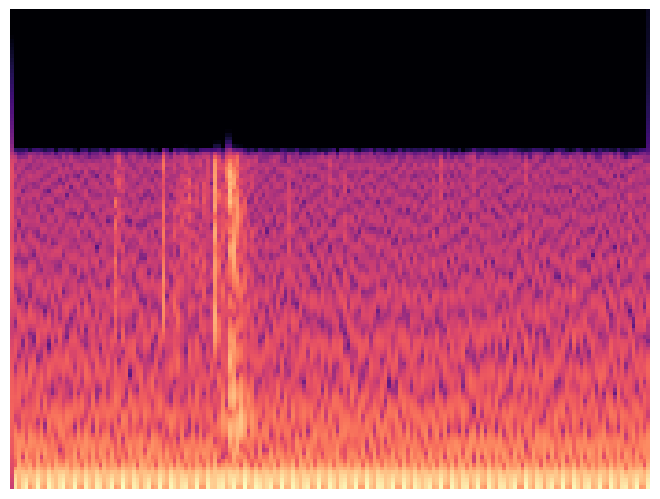

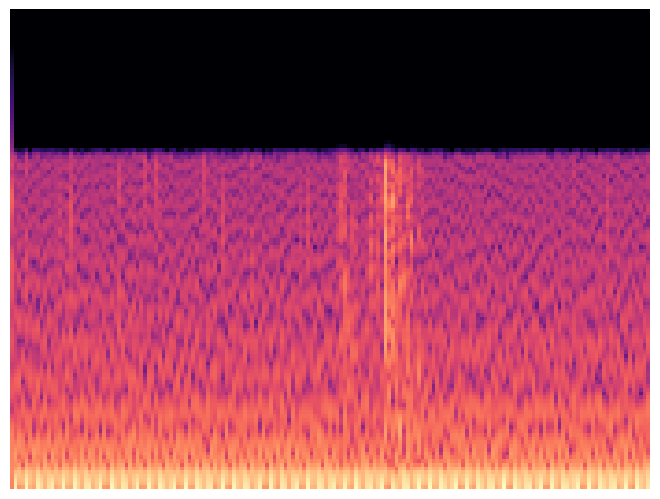

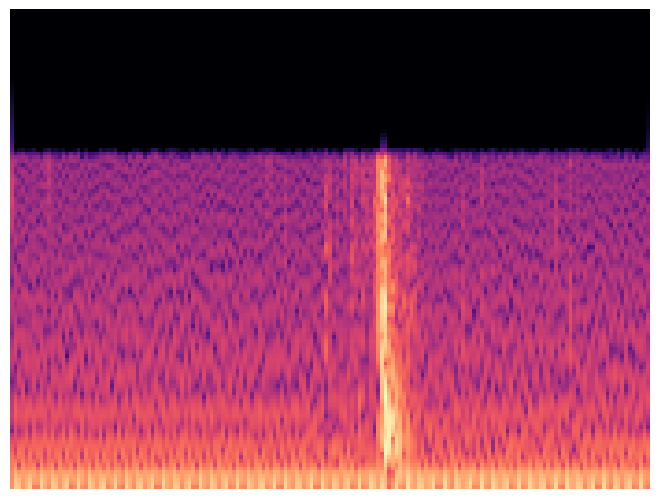

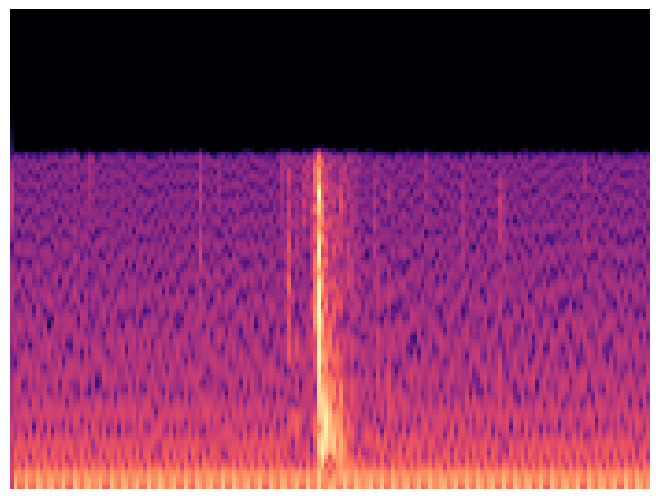

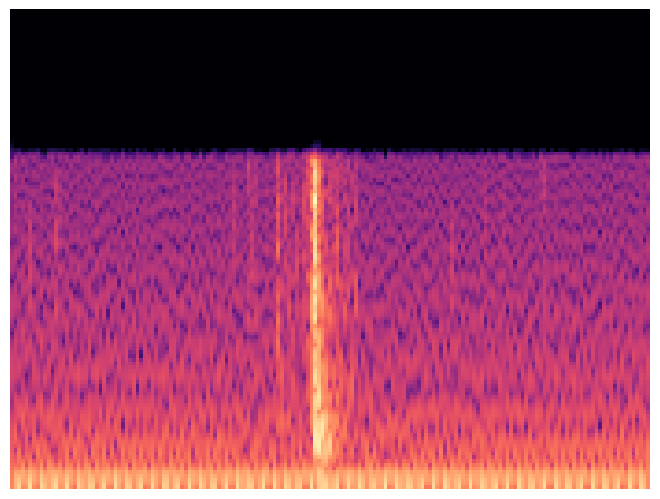

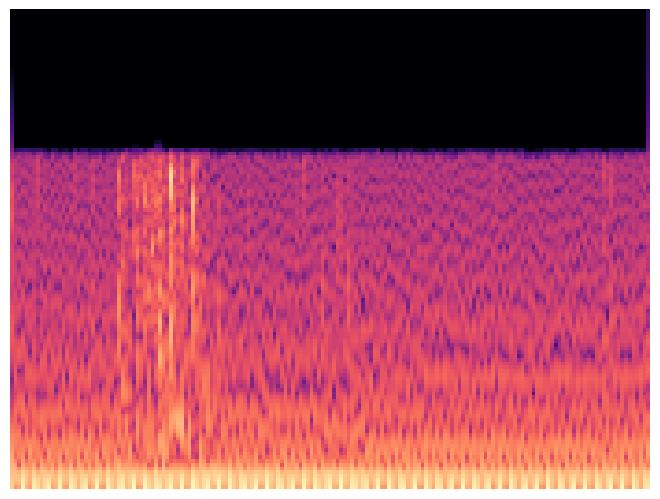

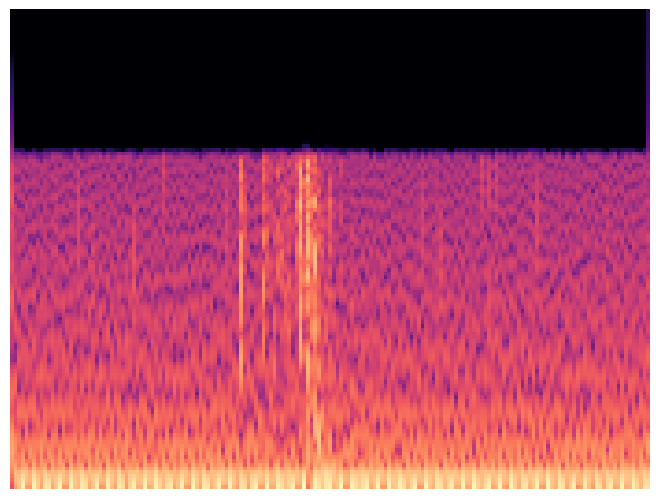

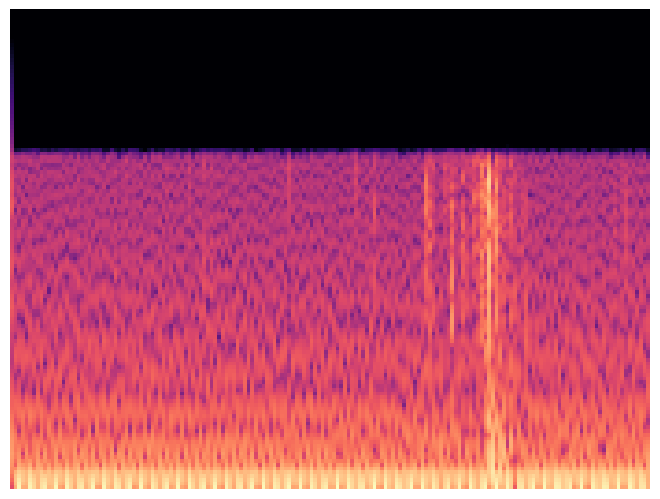

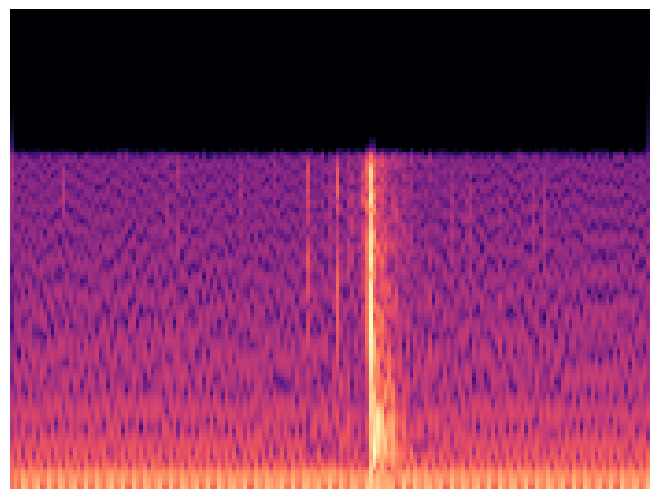

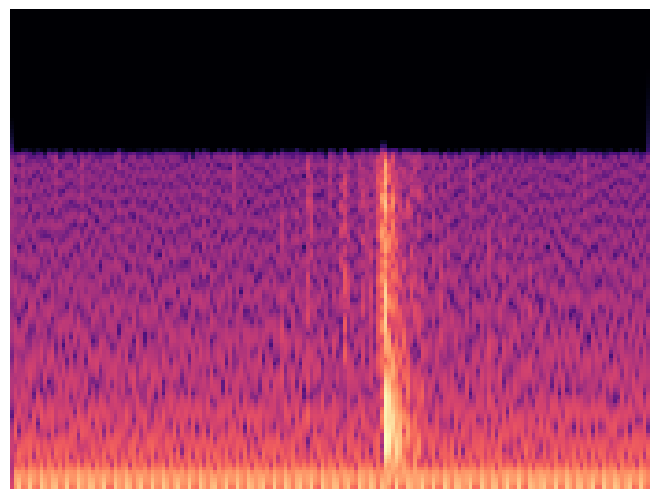

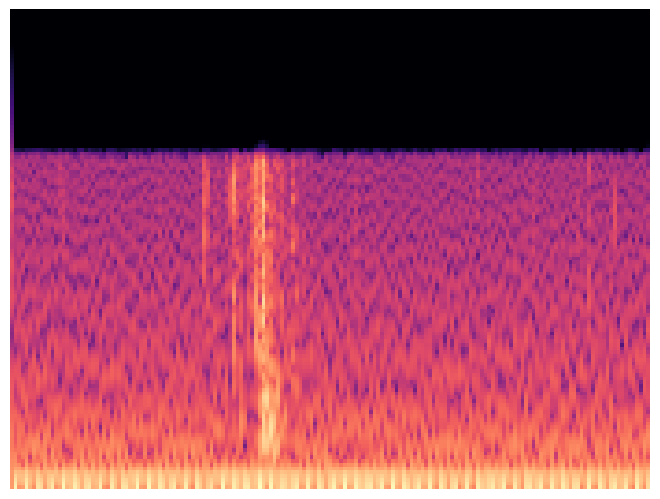

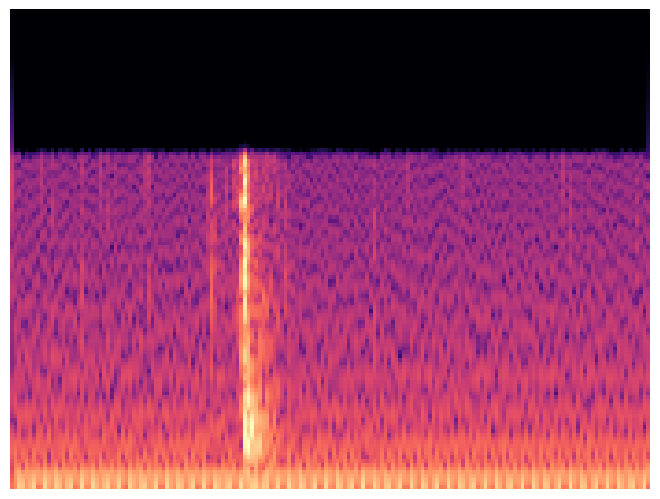

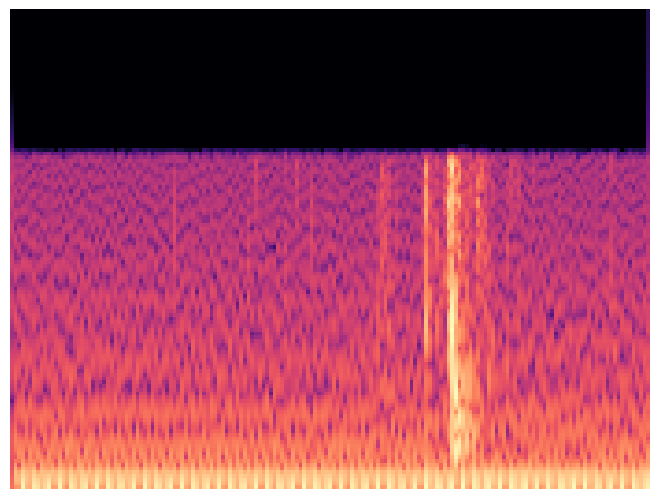

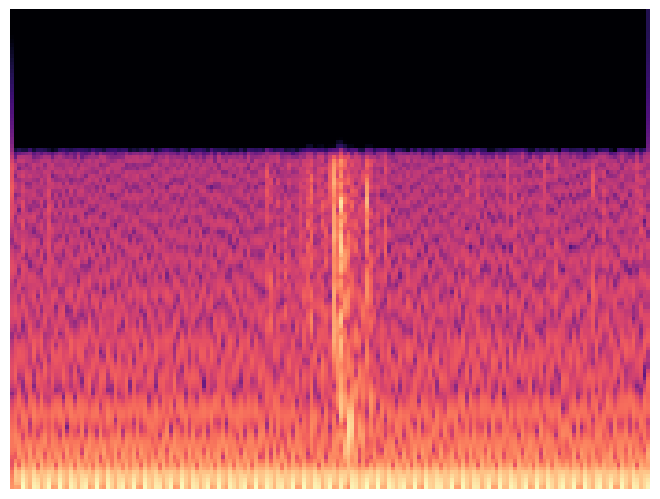

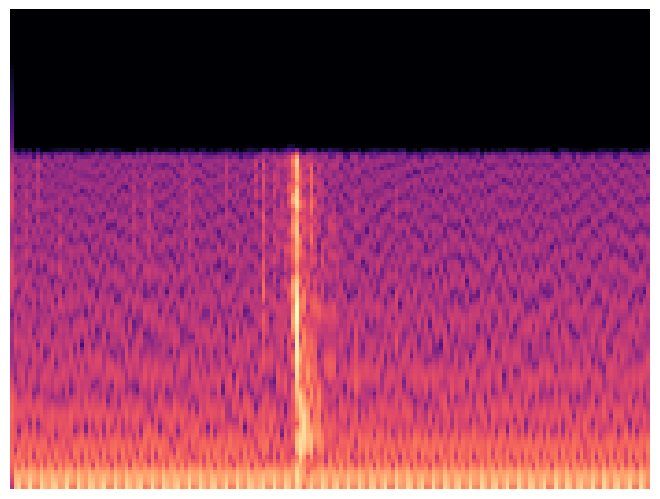

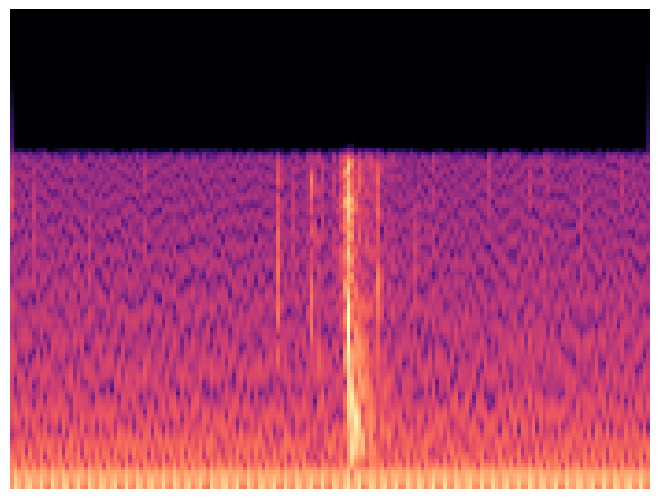

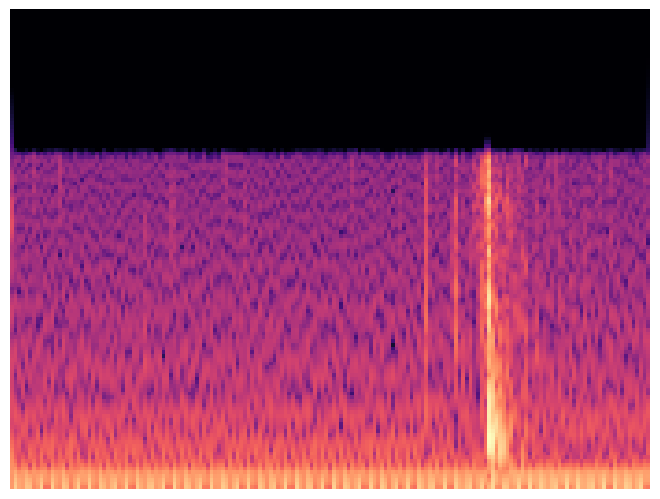

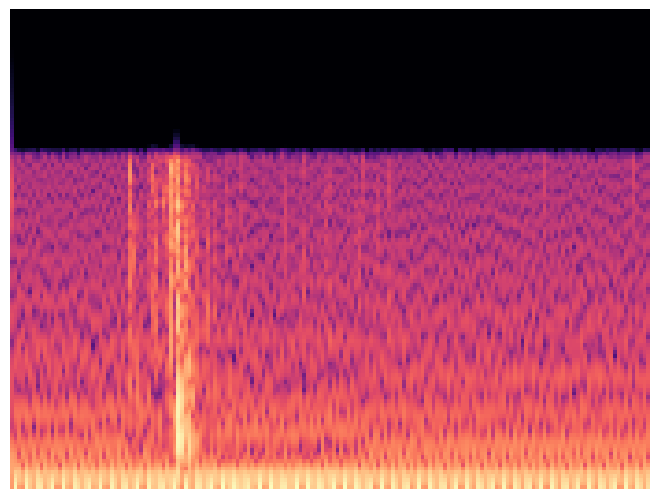

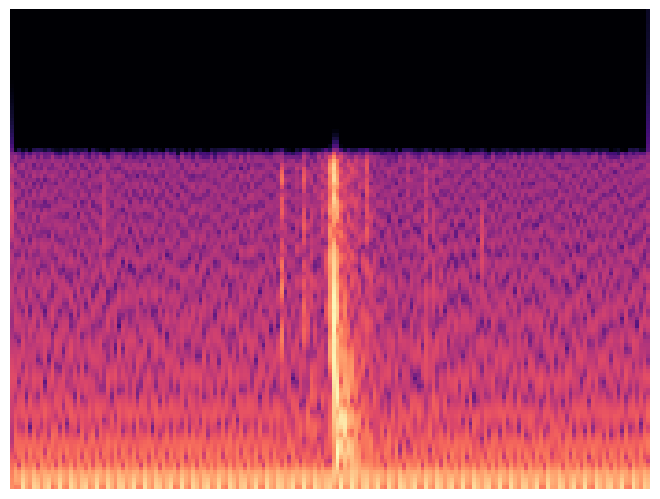

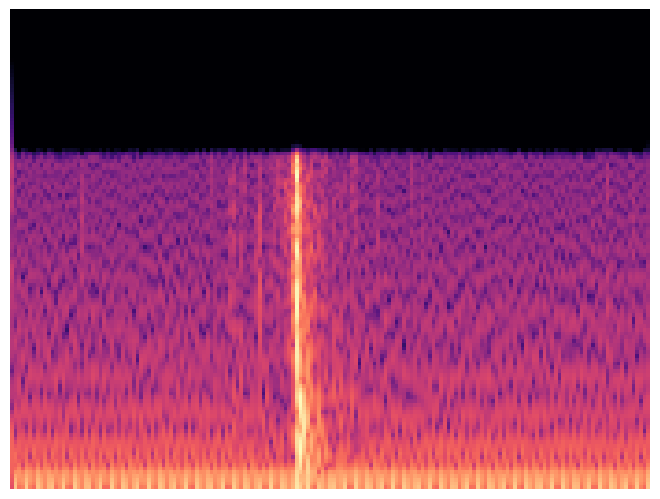

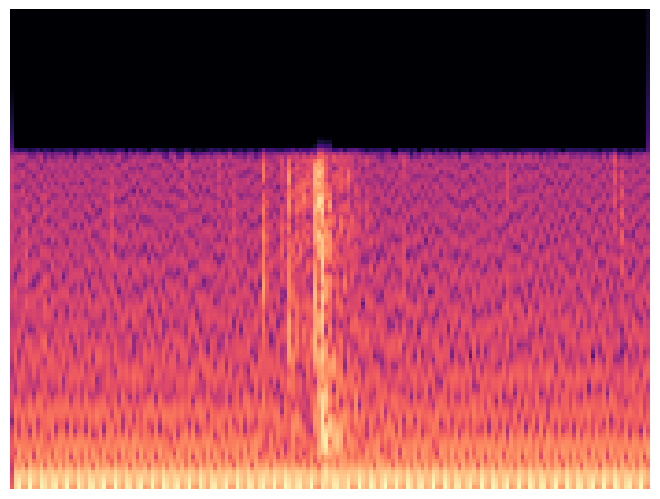

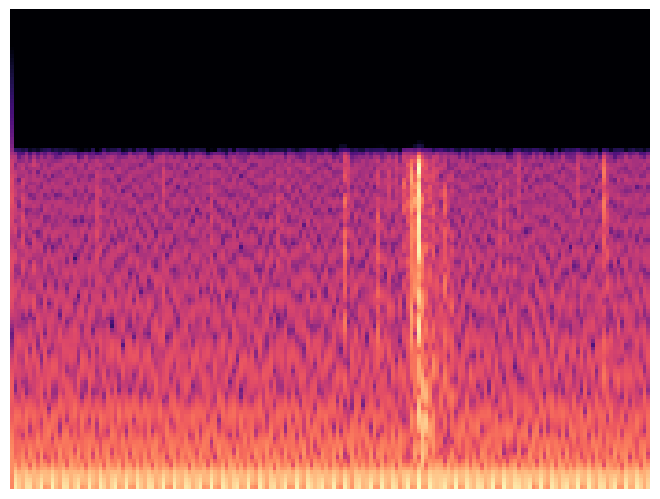

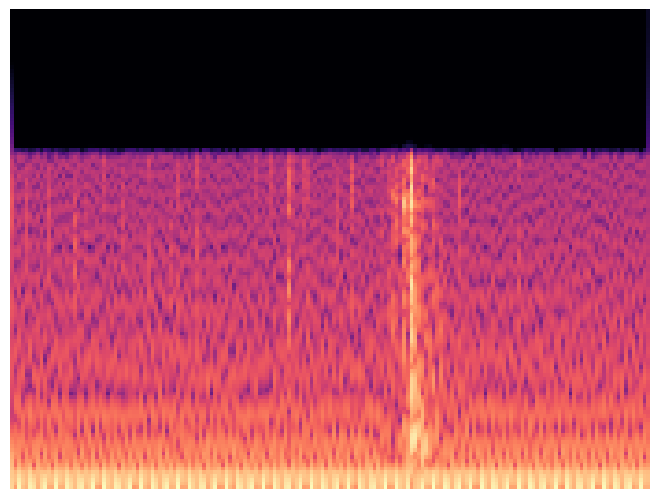

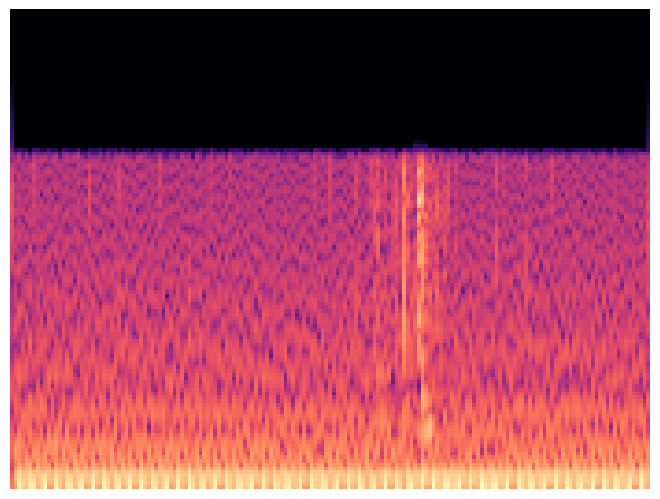

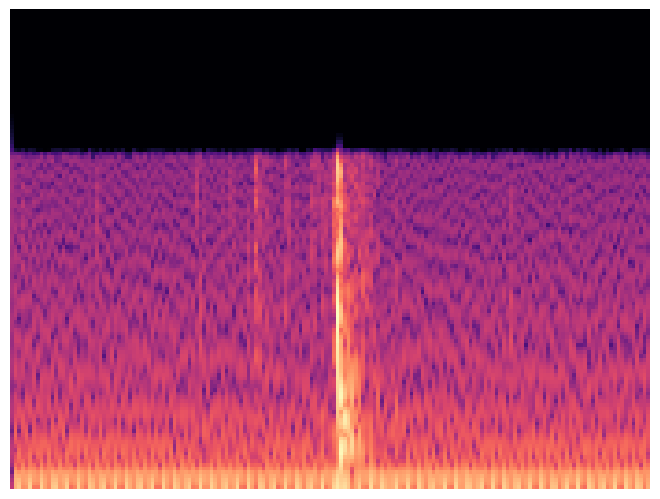

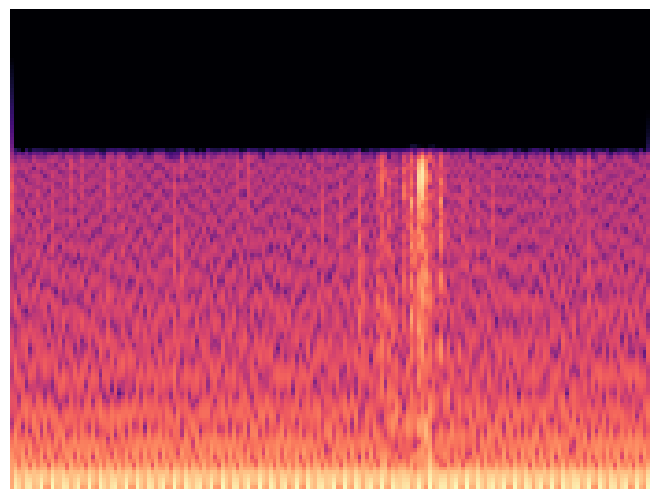

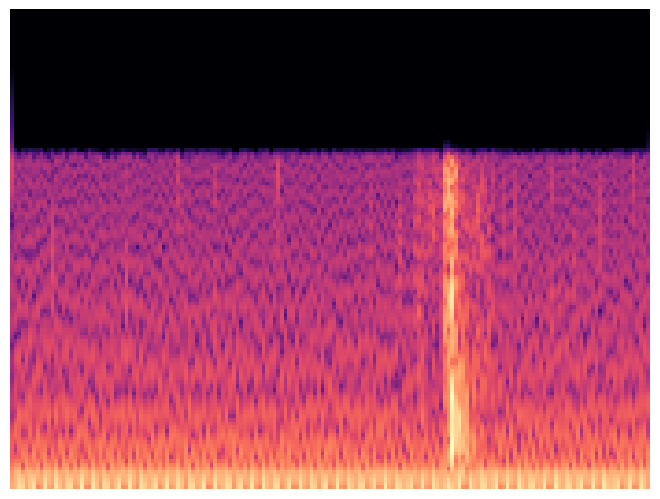

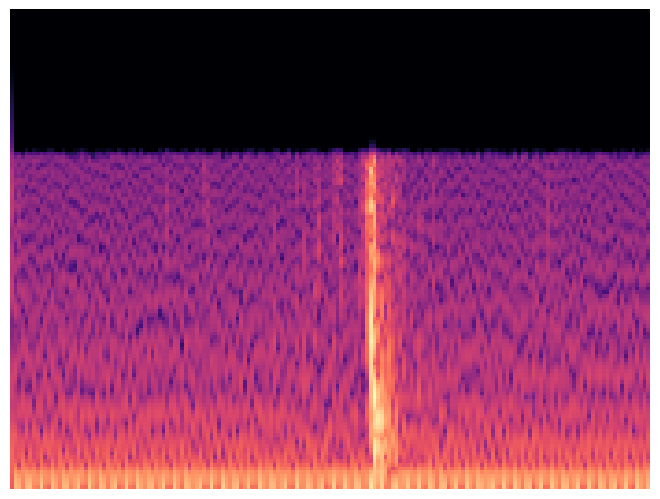

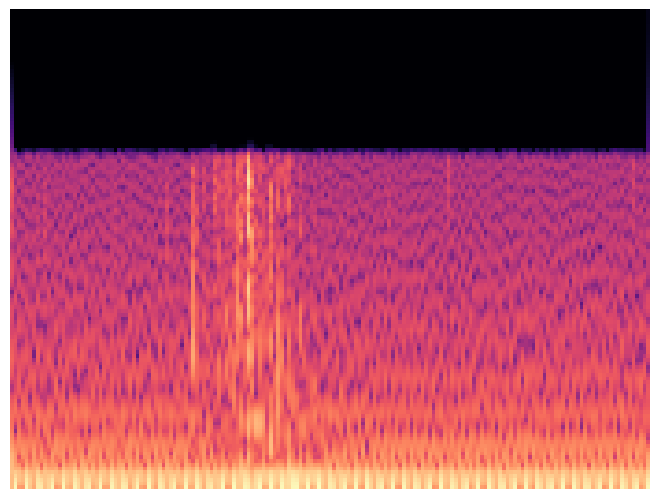

In [9]:
for i in range(N):
    S_dB = librosa.power_to_db(S[i], ref=np.max)
    img[i] = librosa.display.specshow(S_dB, x_axis='time', y_axis='time', sr=sr[i])
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
#     plt.colorbar(img[i], format='%+2.0f dB')
    plt.savefig('./png_audio/'+ str(i+1) +'.png')
    plt.show()

# 学習開始

## ~~tensorflowの準備~~
使いません。

In [10]:
# pip install --upgrade pip

In [11]:
# pip install --upgrade tensorflow

# 学習開始

## 画像を読み込んで、画像データと教師ラベルのリストを作成する

ファイルを一つずつ読み込んで、画像データをXのリストに、フォルダ名を基にした教師ラベルをyのリストに格納します。

In [22]:
import glob
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.preprocessing.image import random_rotation, random_shift, random_zoom
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.models import Sequential
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [19]:
path_dir = "C:\\png_audio"
p = Path(path_dir)

cls_dic = {'0_no_locking':0, '1_locking':1}

X = []
y = []

for name, cls in cls_dic.items():
    child = p / name
    for img in child.glob('*.png'):
        X.append(np.array(Image.open(img)).flatten())
        y.append(cls)

In [20]:
X

[]

## 学習用途テスト用に分割する

全体の20%をテストデータとする

In [15]:
n_samples = N
n_train = int(n_samples * 0.2)
n_test = n_samples - n_train

train_index = range(n_train)
test_index = range(n_train, n_test)

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = X[train_index], y[test_index]

TypeError: list indices must be integers or slices, not range